# Welcome to Modal notebooks!

Write Python code and collaborate in real time. Your code runs in Modal's
**serverless cloud**, and anyone in the same workspace can join.

This notebook comes with some common Python libraries installed. Run
cells with `Shift+Enter`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1000)
y = np.sinc(x)

plt.plot(x, y, color="darkblue")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, alpha=0.3)

In [1]:
import zipfile, os

zip_path = "rice-dataset.zip"
extract_path = "rice_dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_path)

print("✅ Extracted to:", extract_path)
print("Inside:", os.listdir(extract_path)[:20])


✅ Extracted to: rice_dataset
Inside: ['Rice_Leaf_AUG']


In [2]:
import os

for root, dirs, files in os.walk("rice_dataset"):
    if len(dirs) > 0:
        print(root, "->", dirs[:10])
        break


rice_dataset -> ['Rice_Leaf_AUG']


In [1]:
# ===========================
# 1. IMPORT LIBRARIES
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

ModuleNotFoundError: No module named 'cv2'

In [2]:
%uv pip install opencv-python


Using Python 3.12.6 environment at: /usr/local
Resolved 2 packages in 105ms
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠼ Preparing packages... (0/1)
⠼ Preparing packages... 

In [3]:
# ===========================
# 2. PARAMETERS (Optimized for smaller dataset)
# ===========================
IMG_SIZE = 224
BATCH_SIZE = 32
PHASE1_EPOCHS = 25  # Frozen base training
PHASE2_EPOCHS = 50  # Fine-tuning (reduced from 80 total)
LEARNING_RATE = 0.001
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)


NameError: name 'tf' is not defined

In [4]:
import tensorflow as tf
import numpy as np

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
%uv pip install -U tensorflow


Using Python 3.12.6 environment at: /usr/local
Resolved 38 packages in 396ms
⠙ Preparing packages... (0/26)
⠙ Preparing packages... (0/26)
⠙ Preparing packages... (0/26)
gast       ------------------------------     0 B/22.43 KiB
⠙ Preparing packages... (0/26)
gast       ------------------------------ 14.92 KiB/22.43 KiB
⠙ Preparing packages... (0/26)
markupsafe ------------------------------     0 B/22.41 KiB
gast       ------------------------------ 14.92 KiB/22.43 KiB
⠙ Preparing packages... (0/26)
markupsafe ------------------------------ 14.91 KiB/22.41 KiB
gast       ------------------------------ 14.92 KiB/22.43 KiB
⠙ Preparing packages... (0/26)
astunparse ------------------------------     0 B/12.43 KiB
markupsafe ------------------------------ 14.91 KiB/22.41 KiB
gast       ------------------------------ 14.92 KiB/22.43 KiB
⠙ Preparing packages... (0/26)
astunparse ------------------------------ 12.43 KiB/12.43 KiB
markupsafe ------------------------------ 14.91 KiB/22.41 KiB

In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))


2026-01-14 08:03:56.555204: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-14 08:03:56.668949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


2.20.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# ===========================
# 2. PARAMETERS (Optimized for smaller dataset)
# ===========================
IMG_SIZE = 224
BATCH_SIZE = 32
PHASE1_EPOCHS = 25  # Frozen base training
PHASE2_EPOCHS = 50  # Fine-tuning (reduced from 80 total)
LEARNING_RATE = 0.001
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)

NameError: name 'np' is not defined

In [3]:
%uv pip install -U \
tensorflow \
opencv-python \
numpy pandas matplotlib seaborn \
scikit-learn \
pillow


Using Python 3.12.6 environment at: /usr/local
Resolved 54 packages in 334ms
⠙ Preparing packages... (0/9)
⠙ Preparing packages... (0/9)
⠙ Preparing packages... (0/9)
joblib     ------------------------------     0 B/301.83 KiB
⠙ Preparing packages... (0/9)
joblib     ------------------------------ 16.00 KiB/301.83 KiB
⠙ Preparing packages... (0/9)
pyparsing  ------------------------------     0 B/118.94 KiB
joblib     ------------------------------ 16.00 KiB/301.83 KiB
⠙ Preparing packages... (0/9)
pyparsing  ------------------------------ 14.88 KiB/118.94 KiB
joblib     ------------------------------ 16.00 KiB/301.83 KiB
⠙ Preparing packages... (0/9)
pyparsing  ------------------------------ 14.88 KiB/118.94 KiB
joblib     ------------------------------ 16.00 KiB/301.83 KiB
tzdata     ------------------------------ 14.88 KiB/340.35 KiB
⠙ Preparing packages... (0/9)
pyparsing  ------------------------------ 14.88 KiB/118.94 KiB
joblib     ------------------------------ 16.00 KiB/301.8

In [1]:
# ===========================
# 1. IMPORT LIBRARIES
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
# ===========================
# 2. PARAMETERS (Optimized for smaller dataset)
# ===========================
IMG_SIZE = 224
BATCH_SIZE = 32
PHASE1_EPOCHS = 25  # Frozen base training
PHASE2_EPOCHS = 50  # Fine-tuning (reduced from 80 total)
LEARNING_RATE = 0.001
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)

2026-01-14 08:09:18.964421: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-14 08:09:19.052865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.20.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
# ===========================
# 2. PARAMETERS (Optimized for smaller dataset)
# ===========================
IMG_SIZE = 224
BATCH_SIZE = 32
PHASE1_EPOCHS = 25  # Frozen base training
PHASE2_EPOCHS = 50  # Fine-tuning (reduced from 80 total)
LEARNING_RATE = 0.001
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)# ===========================
# 3. DATASET PATH
# ===========================
BASE_DIR = "rice_dataset/Rice_Leaf_AUG"

print("="*70)
print("EXPLORING DATASET STRUCTURE")
print("="*70)

# Explore the dataset structure
for root, dirs, files in os.walk(BASE_DIR):
    level = root.replace(BASE_DIR, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    if level < 2:  # Only show first 2 levels
        subindent = ' ' * 2 * (level + 1)
        if dirs:
            for d in dirs[:10]:  # Show max 10 dirs
                print(f'{subindent}{d}/')

# Find the actual data directory
# Common patterns: train/test split OR single directory with all classes
possible_paths = [
    BASE_DIR,
    os.path.join(BASE_DIR, 'train'),
    os.path.join(BASE_DIR, 'Train'),
    os.path.join(BASE_DIR, 'dataset'),
    os.path.join(BASE_DIR, 'Dataset'),
    os.path.join(BASE_DIR, 'images'),
    os.path.join(BASE_DIR, 'Images'),
]

data_dir = None
for path in possible_paths:
    if os.path.exists(path):
        contents = os.listdir(path)
        # Check if this directory contains class folders
        if contents and all(os.path.isdir(os.path.join(path, c)) for c in contents[:3]):
            data_dir = path
            print(f"\n✅ Found data directory: {data_dir}")
            break

if data_dir is None:
    # If not found, use base directory
    data_dir = BASE_DIR
    print(f"\n⚠️ Using base directory: {data_dir}")

EXPLORING DATASET STRUCTURE
Rice_Leaf_AUG/
  Bacterial Leaf Blight/
  Brown Spot/
  Healthy Rice Leaf/
  Leaf Blast/
  Leaf scald/
  Sheath Blight/
  Bacterial Leaf Blight/
  Brown Spot/
  Healthy Rice Leaf/
  Leaf Blast/
  Leaf scald/
  Sheath Blight/

✅ Found data directory: rice_dataset/Rice_Leaf_AUG



DETECTING CLASSES

Found 6 classes:
  Bacterial Leaf Blight: 636 images
  Brown Spot: 646 images
  Healthy Rice Leaf: 653 images
  Leaf Blast: 634 images
  Leaf scald: 628 images
  Sheath Blight: 632 images

✅ Total images: 3829
✅ Number of classes: 6


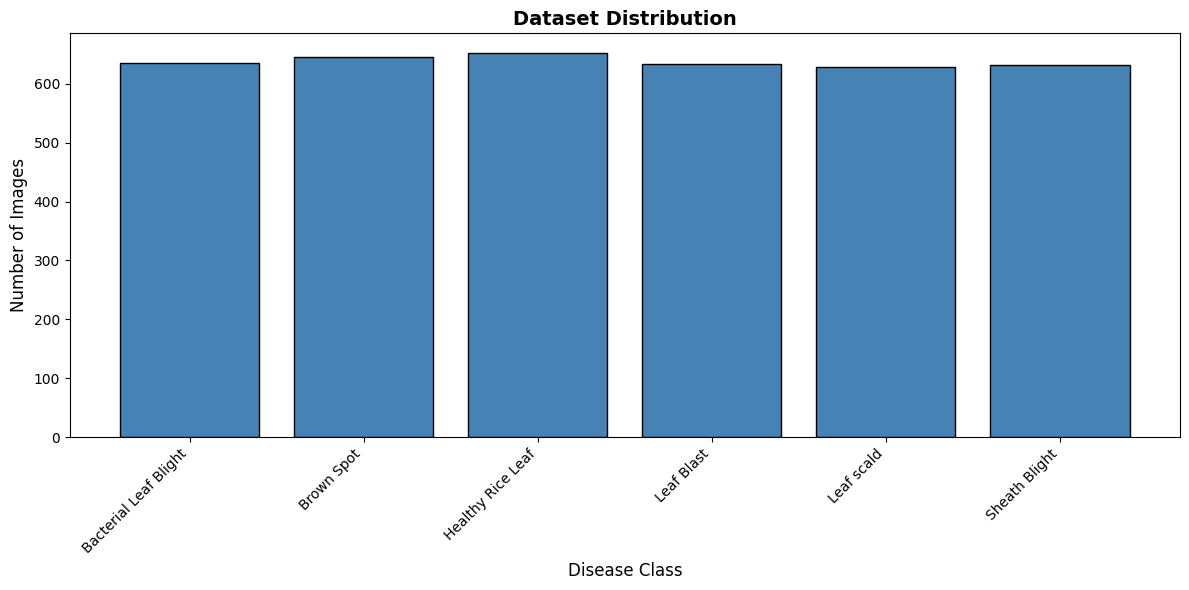

In [8]:
# ===========================
# 4. DETECT CLASSES
# ===========================
print("\n" + "="*70)
print("DETECTING CLASSES")
print("="*70)

# Get class folders
class_folders = sorted([d for d in os.listdir(data_dir) 
                       if os.path.isdir(os.path.join(data_dir, d)) and not d.startswith('.')])

print(f"\nFound {len(class_folders)} classes:")
total_images = 0
class_image_counts = {}

for cls in class_folders:
    cls_path = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    count = len(images)
    class_image_counts[cls] = count
    total_images += count
    print(f"  {cls}: {count} images")

print(f"\n✅ Total images: {total_images}")
print(f"✅ Number of classes: {len(class_folders)}")

NUM_CLASSES = len(class_folders)

# Visualize class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values(), color='steelblue', edgecolor='black')
plt.xlabel('Disease Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Dataset Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
import zipfile, os

zip_path = "rice-dataset.zip"
extract_path = "rice_dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_path)

print("✅ Extracted to:", extract_path)
print("Inside:", os.listdir(extract_path)[:20])

✅ Extracted to: rice_dataset
Inside: ['Rice_Leaf_AUG']


In [9]:
# ===========================
# 5. CHECK FOR TRAIN/TEST SPLIT
# ===========================
print("\n" + "="*70)
print("CHECKING DATASET STRUCTURE")
print("="*70)

# Check if train/test folders exist
train_dir = os.path.join(BASE_DIR, 'train')
test_dir = os.path.join(BASE_DIR, 'test')

has_train_test_split = os.path.exists(train_dir) and os.path.exists(test_dir)

if has_train_test_split:
    print("✅ Dataset has separate train/test folders")
    USE_EXISTING_SPLIT = True
else:
    print("⚠️ No train/test split found. Will create split from single directory.")
    USE_EXISTING_SPLIT = False
    train_dir = data_dir
    test_dir = None


CHECKING DATASET STRUCTURE
⚠️ No train/test split found. Will create split from single directory.


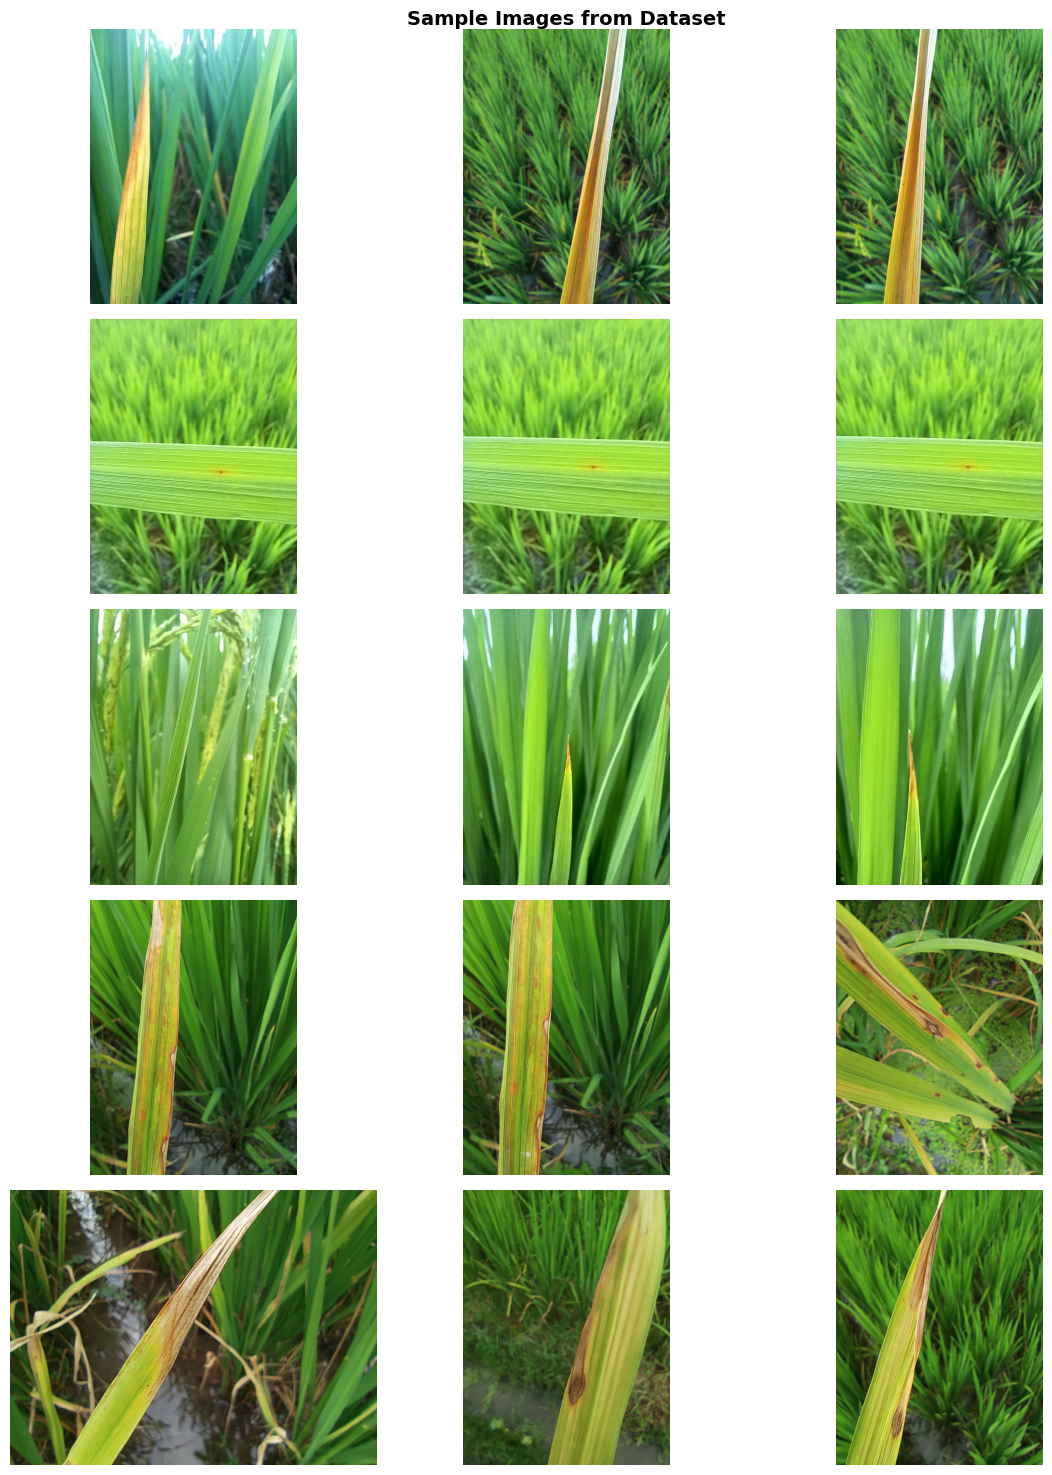

In [10]:
# ===========================
# 6. VISUALIZE SAMPLE IMAGES
# ===========================
def show_sample_images(directory, classes, n_per_class=3):
    """Display sample images from each class"""
    n_classes = len(classes)
    fig, axes = plt.subplots(n_classes, n_per_class, figsize=(12, 3*n_classes))
    
    if n_classes == 1:
        axes = axes.reshape(1, -1)
    
    for i, cls in enumerate(classes):
        cls_path = os.path.join(directory, cls)
        images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for j in range(min(n_per_class, len(images))):
            img_path = os.path.join(cls_path, images[j])
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_ylabel(cls, fontsize=10, fontweight='bold', rotation=0, 
                                         labelpad=50, ha='right')
    
    plt.suptitle('Sample Images from Dataset', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

show_sample_images(train_dir, class_folders[:min(5, len(class_folders))], n_per_class=3)


In [11]:
# ===========================
# 7. CREATE DATA GENERATORS
# ===========================
print("\n" + "="*70)
print("CREATING DATA GENERATORS")
print("="*70)

# Strong augmentation for small dataset
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2  # 80-20 split
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

if USE_EXISTING_SPLIT:
    # Use existing train/test folders
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=SEED
    )
    
    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=SEED
    )
    
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )
else:
    # Create split from single directory
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=SEED
    )
    
    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=SEED
    )
    
    # Use validation as test for final evaluation
    test_generator = validation_generator

print(f"\n✅ Train samples: {train_generator.samples}")
print(f"✅ Validation samples: {validation_generator.samples}")
print(f"✅ Test samples: {test_generator.samples}")
print(f"\n📊 Class indices: {train_generator.class_indices}")



CREATING DATA GENERATORS
Found 3066 images belonging to 6 classes.
Found 763 images belonging to 6 classes.

✅ Train samples: 3066
✅ Validation samples: 763
✅ Test samples: 763

📊 Class indices: {'Bacterial Leaf Blight': 0, 'Brown Spot': 1, 'Healthy Rice Leaf': 2, 'Leaf Blast': 3, 'Leaf scald': 4, 'Sheath Blight': 5}


In [12]:
# ===========================
# 8. BUILD MODEL - MobileNetV2
# ===========================
print("\n" + "="*70)
print("BUILDING MODEL")
print("="*70)

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # MobileNetV2 base
    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=inputs,
        pooling='avg'
    )
    
    base_model.trainable = False
    
    # Classification head
    x = base_model.output
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model, base_model

model, base_model = build_model(NUM_CLASSES)

print(f"✅ Total parameters: {model.count_params():,}")



BUILDING MODEL


I0000 00:00:1768378501.168392     384 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:e7:00.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Total parameters: 2,619,590


In [13]:
# ===========================
# 9. COMPILE & CALLBACKS
# ===========================
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,  # Reduced from 15
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=5,  # Reduced from 7
        mode='max',
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_rice_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

In [14]:
# ===========================
# 10. PHASE 1 - FROZEN BASE
# ===========================
print("\n" + "="*70)
print(f"PHASE 1: Training with Frozen Base ({PHASE1_EPOCHS} epochs)")
print("="*70)

history1 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=PHASE1_EPOCHS,
    callbacks=callbacks,
    verbose=1
)

print(f"\n📊 Phase 1 Best: {max(history1.history['val_accuracy']):.4f}")


PHASE 1: Training with Frozen Base (25 epochs)
Epoch 1/25


2026-01-14 08:16:09.221234: I external/local_xla/xla/service/service.cc:163] XLA service 0x2adb700022d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-14 08:16:09.221285: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2026-01-14 08:16:09.554708: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-14 08:16:11.709076: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2026-01-14 08:16:15.457175: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-14 08:16:15.596808: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time h

 2/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.1562 - loss: 2.4844  

I0000 00:00:1768378579.790130     619 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/96 ━━━━━━━━━━━━━━━━━━━━ 38s 453ms/step - accuracy: 0.1733 - loss: 2.2654

2026-01-14 08:16:28.720635: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-14 08:16:28.859470: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.3065 - loss: 1.7826

2026-01-14 08:17:45.010924: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-14 08:17:45.149600: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.



Epoch 1: val_accuracy improved from None to 0.53735, saving model to best_rice_model.h5



Epoch 1: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 108s 931ms/step - accuracy: 0.4129 - loss: 1.5070 - val_accuracy: 0.5374 - val_loss: 1.1978 - learning_rate: 0.0010
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.5325 - loss: 1.2204
Epoch 2: val_accuracy did not improve from 0.53735
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 717ms/step - accuracy: 0.5492 - loss: 1.1767 - val_accuracy: 0.4875 - val_loss: 1.3557 - learning_rate: 0.0010
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.5597 - loss: 1.1124
Epoch 3: val_accuracy did not improve from 0.53735
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 736ms/step - accuracy: 0.5802 - loss: 1.0861 - val_accuracy: 0.4941 - val_loss: 1.3343 - learning_rate: 0.0010
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6208 - loss: 0.9921
Epoch 4: val_accuracy improved from 0.53735 to 0.57143, saving model to best_rice_model.h5



Epoch 4: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 728ms/step - accuracy: 0.6187 - loss: 0.9943 - val_accuracy: 0.5714 - val_loss: 1.1686 - learning_rate: 0.0010
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.6309 - loss: 0.9652
Epoch 5: val_accuracy did not improve from 0.57143
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 722ms/step - accuracy: 0.6321 - loss: 0.9632 - val_accuracy: 0.5465 - val_loss: 1.2218 - learning_rate: 0.0010
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.6541 - loss: 0.9079
Epoch 6: val_accuracy did not improve from 0.57143
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 735ms/step - accuracy: 0.6468 - loss: 0.9260 - val_accuracy: 0.5531 - val_loss: 1.2311 - learning_rate: 0.0010
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.6250 - loss: 0.9467
Epoch 7: val_accuracy did not improve from 0.57143
96/96 ━━━━━━━━━━━━━━━━━━━━ 68s 713ms/step - accuracy: 0.6373 - loss: 0.9258 - val_accuracy: 0.5675 - val_loss


Epoch 8: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 718ms/step - accuracy: 0.6526 - loss: 0.8791 - val_accuracy: 0.5911 - val_loss: 1.1672 - learning_rate: 0.0010
Epoch 9/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.6767 - loss: 0.8645
Epoch 9: val_accuracy improved from 0.59109 to 0.59633, saving model to best_rice_model.h5



Epoch 9: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 751ms/step - accuracy: 0.6761 - loss: 0.8647 - val_accuracy: 0.5963 - val_loss: 1.0576 - learning_rate: 0.0010
Epoch 10/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.6693 - loss: 0.8804
Epoch 10: val_accuracy did not improve from 0.59633
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 745ms/step - accuracy: 0.6706 - loss: 0.8598 - val_accuracy: 0.5701 - val_loss: 1.3427 - learning_rate: 0.0010
Epoch 11/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.6828 - loss: 0.8187
Epoch 11: val_accuracy improved from 0.59633 to 0.61992, saving model to best_rice_model.h5



Epoch 11: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 737ms/step - accuracy: 0.6712 - loss: 0.8382 - val_accuracy: 0.6199 - val_loss: 0.9925 - learning_rate: 0.0010
Epoch 12/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.6916 - loss: 0.8193
Epoch 12: val_accuracy did not improve from 0.61992
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 729ms/step - accuracy: 0.6898 - loss: 0.8076 - val_accuracy: 0.5898 - val_loss: 1.2253 - learning_rate: 0.0010
Epoch 13/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.6992 - loss: 0.8032
Epoch 13: val_accuracy did not improve from 0.61992
96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 704ms/step - accuracy: 0.6970 - loss: 0.8114 - val_accuracy: 0.6186 - val_loss: 1.1554 - learning_rate: 0.0010
Epoch 14/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6930 - loss: 0.7942
Epoch 14: val_accuracy did not improve from 0.61992
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 741ms/step - accuracy: 0.7074 - loss: 0.7827 - val_accuracy: 0.5754 - v


Epoch 15: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 739ms/step - accuracy: 0.7068 - loss: 0.7833 - val_accuracy: 0.6540 - val_loss: 0.9793 - learning_rate: 0.0010
Epoch 16/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.7107 - loss: 0.7661
Epoch 16: val_accuracy did not improve from 0.65400
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 744ms/step - accuracy: 0.7029 - loss: 0.7762 - val_accuracy: 0.6291 - val_loss: 1.0877 - learning_rate: 0.0010
Epoch 17/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.7130 - loss: 0.7432
Epoch 17: val_accuracy did not improve from 0.65400
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 748ms/step - accuracy: 0.7094 - loss: 0.7611 - val_accuracy: 0.6291 - val_loss: 1.1034 - learning_rate: 0.0010
Epoch 18/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.7098 - loss: 0.7616
Epoch 18: val_accuracy did not improve from 0.65400
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 736ms/step - accuracy: 0.7091 - loss: 0.7604 - val_accuracy: 0.6396 - v


Epoch 25: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 681ms/step - accuracy: 0.7466 - loss: 0.6734 - val_accuracy: 0.6553 - val_loss: 1.0169 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 25.

📊 Phase 1 Best: 0.6553


In [15]:
# ===========================
# 11. PHASE 2 - FINE-TUNING
# ===========================
print("\n" + "="*70)
print(f"PHASE 2: Fine-tuning ({PHASE2_EPOCHS} total epochs)")
print("="*70)

base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE/10),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=PHASE2_EPOCHS,
    initial_epoch=len(history1.history['loss']),
    callbacks=callbacks,
    verbose=1
)

print(f"\n📊 Phase 2 Best: {max(history2.history['val_accuracy']):.4f}")


PHASE 2: Fine-tuning (50 total epochs)
Epoch 26/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5796 - loss: 1.3395
Epoch 26: val_accuracy did not improve from 0.65531
96/96 ━━━━━━━━━━━━━━━━━━━━ 107s 853ms/step - accuracy: 0.6618 - loss: 0.9739 - val_accuracy: 0.5754 - val_loss: 1.5656 - learning_rate: 1.0000e-04
Epoch 27/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7641 - loss: 0.6457
Epoch 27: val_accuracy did not improve from 0.65531
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 688ms/step - accuracy: 0.7603 - loss: 0.6489 - val_accuracy: 0.5531 - val_loss: 1.7887 - learning_rate: 1.0000e-04
Epoch 28/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.7946 - loss: 0.5687
Epoch 28: val_accuracy did not improve from 0.65531
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 676ms/step - accuracy: 0.7994 - loss: 0.5465 - val_accuracy: 0.6003 - val_loss: 1.7001 - learning_rate: 1.0000e-04
Epoch 29/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.8277 - loss: 0.4911
Epoch 29: val_acc


Epoch 31: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 678ms/step - accuracy: 0.8604 - loss: 0.3904 - val_accuracy: 0.6841 - val_loss: 1.1146 - learning_rate: 5.0000e-05
Epoch 32/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8698 - loss: 0.3640
Epoch 32: val_accuracy improved from 0.68414 to 0.72215, saving model to best_rice_model.h5



Epoch 32: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 676ms/step - accuracy: 0.8705 - loss: 0.3475 - val_accuracy: 0.7221 - val_loss: 0.9021 - learning_rate: 5.0000e-05
Epoch 33/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8801 - loss: 0.3501
Epoch 33: val_accuracy improved from 0.72215 to 0.72477, saving model to best_rice_model.h5



Epoch 33: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 662ms/step - accuracy: 0.8751 - loss: 0.3591 - val_accuracy: 0.7248 - val_loss: 0.8353 - learning_rate: 5.0000e-05
Epoch 34/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8667 - loss: 0.3582
Epoch 34: val_accuracy did not improve from 0.72477
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 661ms/step - accuracy: 0.8787 - loss: 0.3273 - val_accuracy: 0.7182 - val_loss: 0.9335 - learning_rate: 5.0000e-05
Epoch 35/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8966 - loss: 0.2786
Epoch 35: val_accuracy improved from 0.72477 to 0.72608, saving model to best_rice_model.h5



Epoch 35: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 671ms/step - accuracy: 0.8995 - loss: 0.2840 - val_accuracy: 0.7261 - val_loss: 0.9376 - learning_rate: 5.0000e-05
Epoch 36/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9007 - loss: 0.3006
Epoch 36: val_accuracy improved from 0.72608 to 0.78244, saving model to best_rice_model.h5



Epoch 36: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 662ms/step - accuracy: 0.9038 - loss: 0.2840 - val_accuracy: 0.7824 - val_loss: 0.6408 - learning_rate: 5.0000e-05
Epoch 37/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9005 - loss: 0.2824
Epoch 37: val_accuracy improved from 0.78244 to 0.79161, saving model to best_rice_model.h5



Epoch 37: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 659ms/step - accuracy: 0.9022 - loss: 0.2770 - val_accuracy: 0.7916 - val_loss: 0.6639 - learning_rate: 5.0000e-05
Epoch 38/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.8965 - loss: 0.2581
Epoch 38: val_accuracy improved from 0.79161 to 0.79554, saving model to best_rice_model.h5



Epoch 38: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 658ms/step - accuracy: 0.9012 - loss: 0.2610 - val_accuracy: 0.7955 - val_loss: 0.6171 - learning_rate: 5.0000e-05
Epoch 39/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9255 - loss: 0.2288
Epoch 39: val_accuracy improved from 0.79554 to 0.79685, saving model to best_rice_model.h5



Epoch 39: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 670ms/step - accuracy: 0.9276 - loss: 0.2221 - val_accuracy: 0.7969 - val_loss: 0.6366 - learning_rate: 5.0000e-05
Epoch 40/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9258 - loss: 0.2229
Epoch 40: val_accuracy did not improve from 0.79685
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 665ms/step - accuracy: 0.9220 - loss: 0.2300 - val_accuracy: 0.7785 - val_loss: 0.6810 - learning_rate: 5.0000e-05
Epoch 41/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9253 - loss: 0.2177
Epoch 41: val_accuracy improved from 0.79685 to 0.81651, saving model to best_rice_model.h5



Epoch 41: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 660ms/step - accuracy: 0.9217 - loss: 0.2271 - val_accuracy: 0.8165 - val_loss: 0.5828 - learning_rate: 5.0000e-05
Epoch 42/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9196 - loss: 0.2346
Epoch 42: val_accuracy improved from 0.81651 to 0.84142, saving model to best_rice_model.h5



Epoch 42: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 666ms/step - accuracy: 0.9234 - loss: 0.2237 - val_accuracy: 0.8414 - val_loss: 0.5038 - learning_rate: 5.0000e-05
Epoch 43/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9211 - loss: 0.2085
Epoch 43: val_accuracy did not improve from 0.84142
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 657ms/step - accuracy: 0.9204 - loss: 0.2167 - val_accuracy: 0.8349 - val_loss: 0.5857 - learning_rate: 5.0000e-05
Epoch 44/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9388 - loss: 0.1852
Epoch 44: val_accuracy did not improve from 0.84142
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 655ms/step - accuracy: 0.9335 - loss: 0.1997 - val_accuracy: 0.7890 - val_loss: 0.6787 - learning_rate: 5.0000e-05
Epoch 45/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9314 - loss: 0.1890
Epoch 45: val_accuracy did not improve from 0.84142
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 649ms/step - accuracy: 0.9357 - loss: 0.1893 - val_accuracy


Epoch 48: finished saving model to best_rice_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 655ms/step - accuracy: 0.9397 - loss: 0.1756 - val_accuracy: 0.8453 - val_loss: 0.5050 - learning_rate: 2.5000e-05
Epoch 49/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9597 - loss: 0.1368
Epoch 49: val_accuracy did not improve from 0.84535
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 661ms/step - accuracy: 0.9576 - loss: 0.1373 - val_accuracy: 0.8296 - val_loss: 0.5244 - learning_rate: 2.5000e-05
Epoch 50/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9442 - loss: 0.1480
Epoch 50: val_accuracy did not improve from 0.84535
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 661ms/step - accuracy: 0.9478 - loss: 0.1517 - val_accuracy: 0.8388 - val_loss: 0.5278 - learning_rate: 2.5000e-05
Restoring model weights from the end of the best epoch: 48.

📊 Phase 2 Best: 0.8453


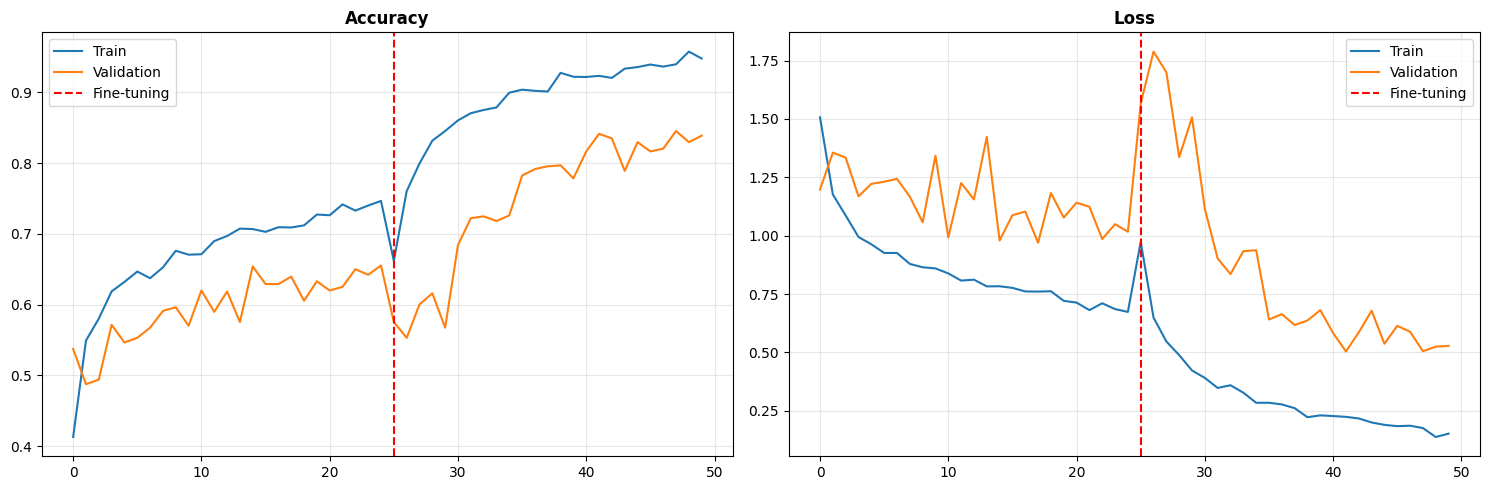


📊 Best Validation Accuracy: 0.8453 (84.53%)


In [16]:
# ===========================
# 12. PLOT TRAINING
# ===========================
history = {
    'accuracy': history1.history['accuracy'] + history2.history['accuracy'],
    'val_accuracy': history1.history['val_accuracy'] + history2.history['val_accuracy'],
    'loss': history1.history['loss'] + history2.history['loss'],
    'val_loss': history1.history['val_loss'] + history2.history['val_loss']
}

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history['accuracy'], label='Train')
axes[0].plot(history['val_accuracy'], label='Validation')
axes[0].axvline(x=PHASE1_EPOCHS, color='red', linestyle='--', label='Fine-tuning')
axes[0].set_title('Accuracy', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(history['loss'], label='Train')
axes[1].plot(history['val_loss'], label='Validation')
axes[1].axvline(x=PHASE1_EPOCHS, color='red', linestyle='--', label='Fine-tuning')
axes[1].set_title('Loss', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

best_acc = max(history['val_accuracy'])
print(f"\n📊 Best Validation Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")



EVALUATION


24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 986ms/step - accuracy: 0.8231 - loss: 0.5936

Test Accuracy: 0.8231 (82.31%)
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step

CLASSIFICATION REPORT
                       precision    recall  f1-score   support

Bacterial Leaf Blight     0.8095    0.8031    0.8063       127
           Brown Spot     0.8908    0.8217    0.8548       129
    Healthy Rice Leaf     0.8958    0.9923    0.9416       130
           Leaf Blast     0.8000    0.5397    0.6445       126
           Leaf scald     0.8500    0.9520    0.8981       125
        Sheath Blight     0.8188    0.9683    0.8873       126

             accuracy                         0.8467       763
            macro avg     0.8442    0.8462    0.8388       763
         weighted avg     0.8446    0.8467    0.8393       763



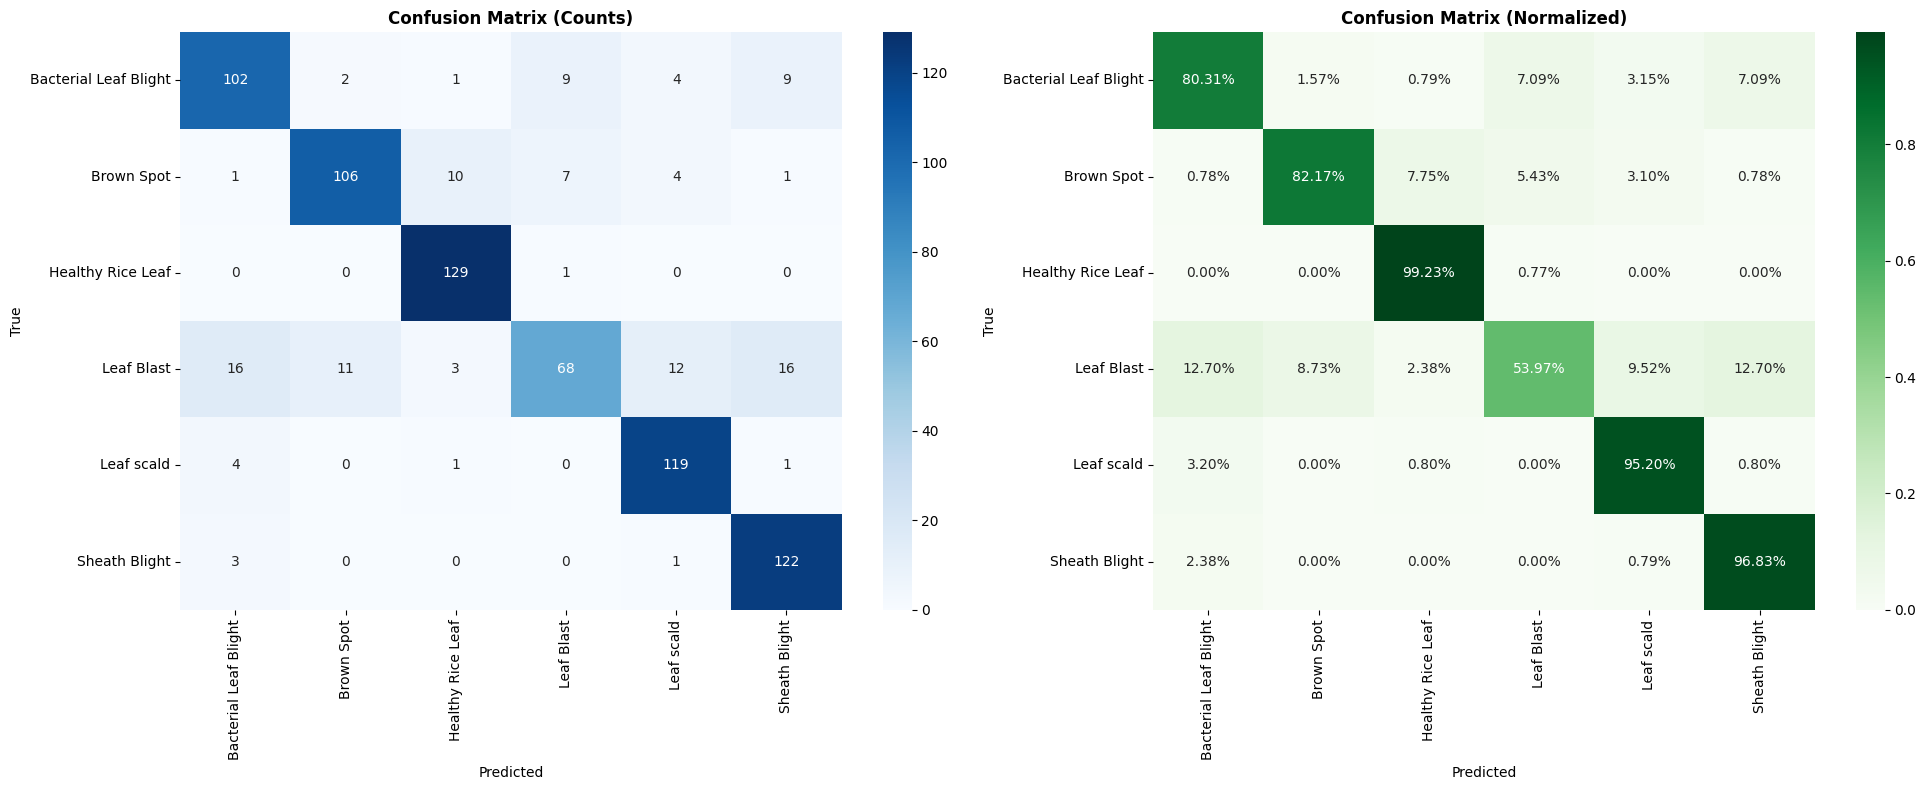

2026-01-14 09:17:48.049330: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-14 09:17:48.187672: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


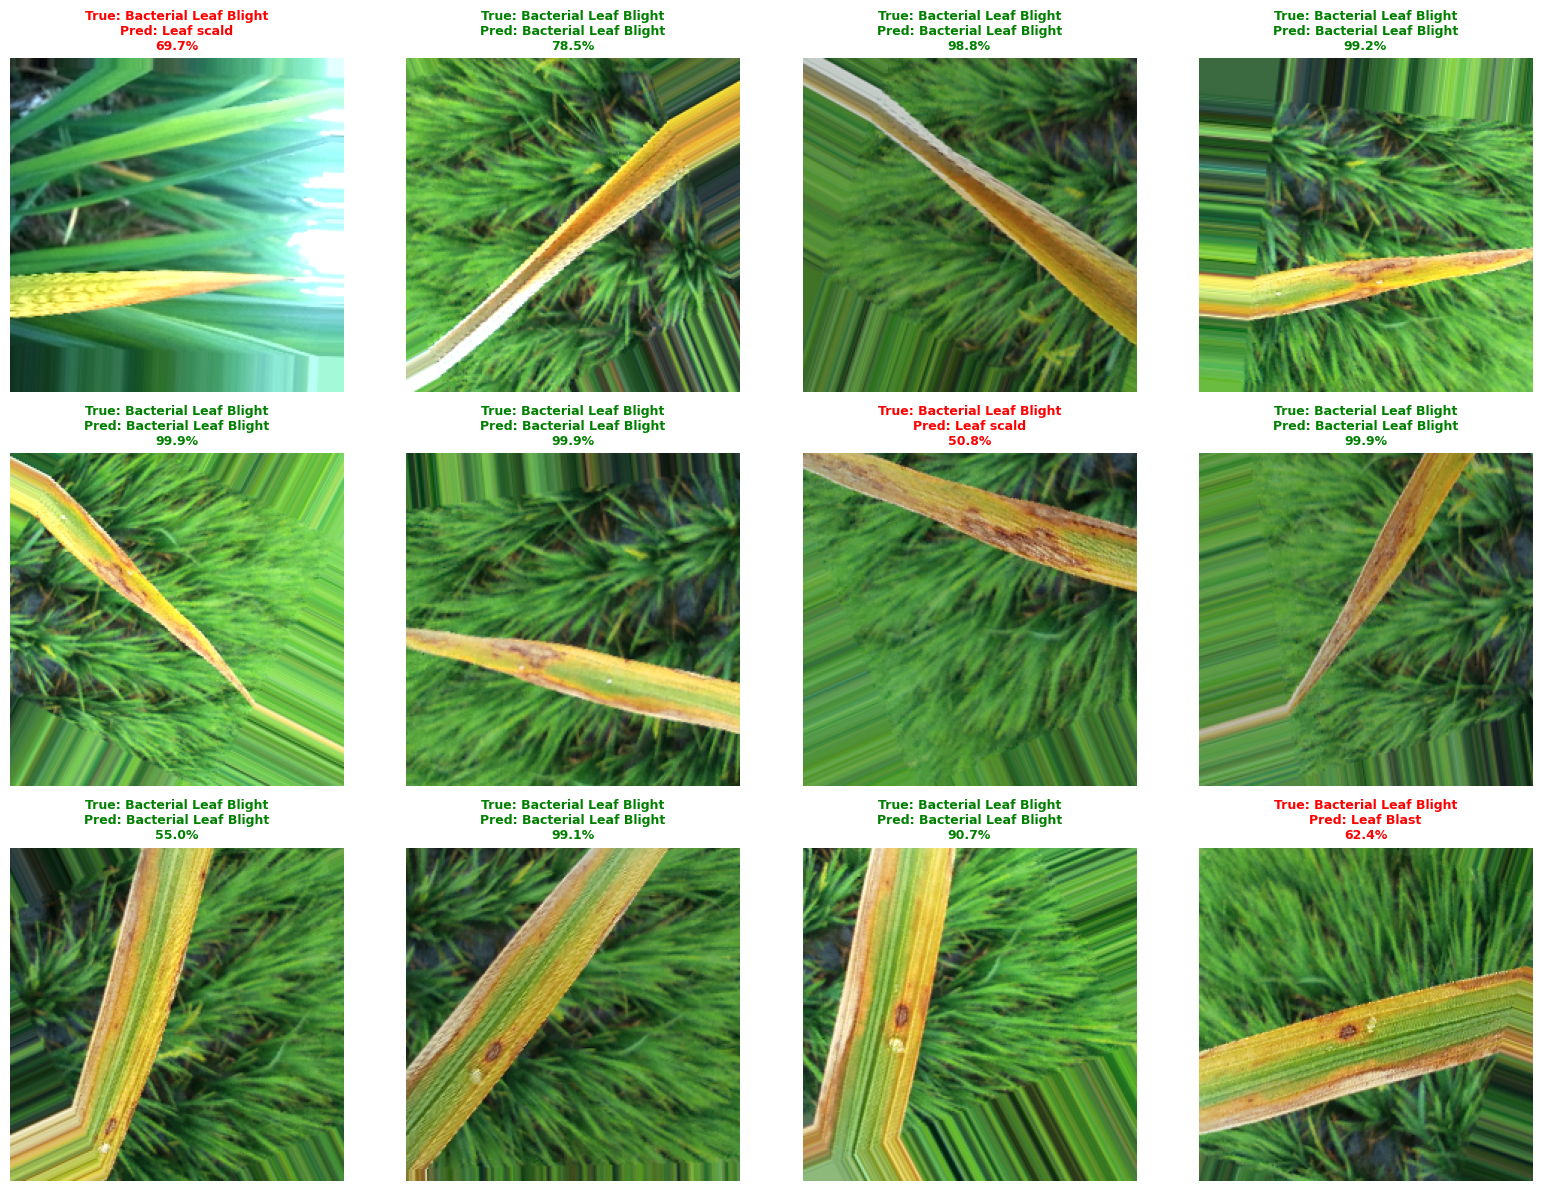


PER-CLASS PERFORMANCE
                Class  Precision   Recall  F1-Score  Support
Bacterial Leaf Blight   0.809524 0.803150  0.806324      127
           Brown Spot   0.890756 0.821705  0.854839      129
    Healthy Rice Leaf   0.895833 0.992308  0.941606      130
           Leaf Blast   0.800000 0.539683  0.644550      126
           Leaf scald   0.850000 0.952000  0.898113      125
        Sheath Blight   0.818792 0.968254  0.887273      126


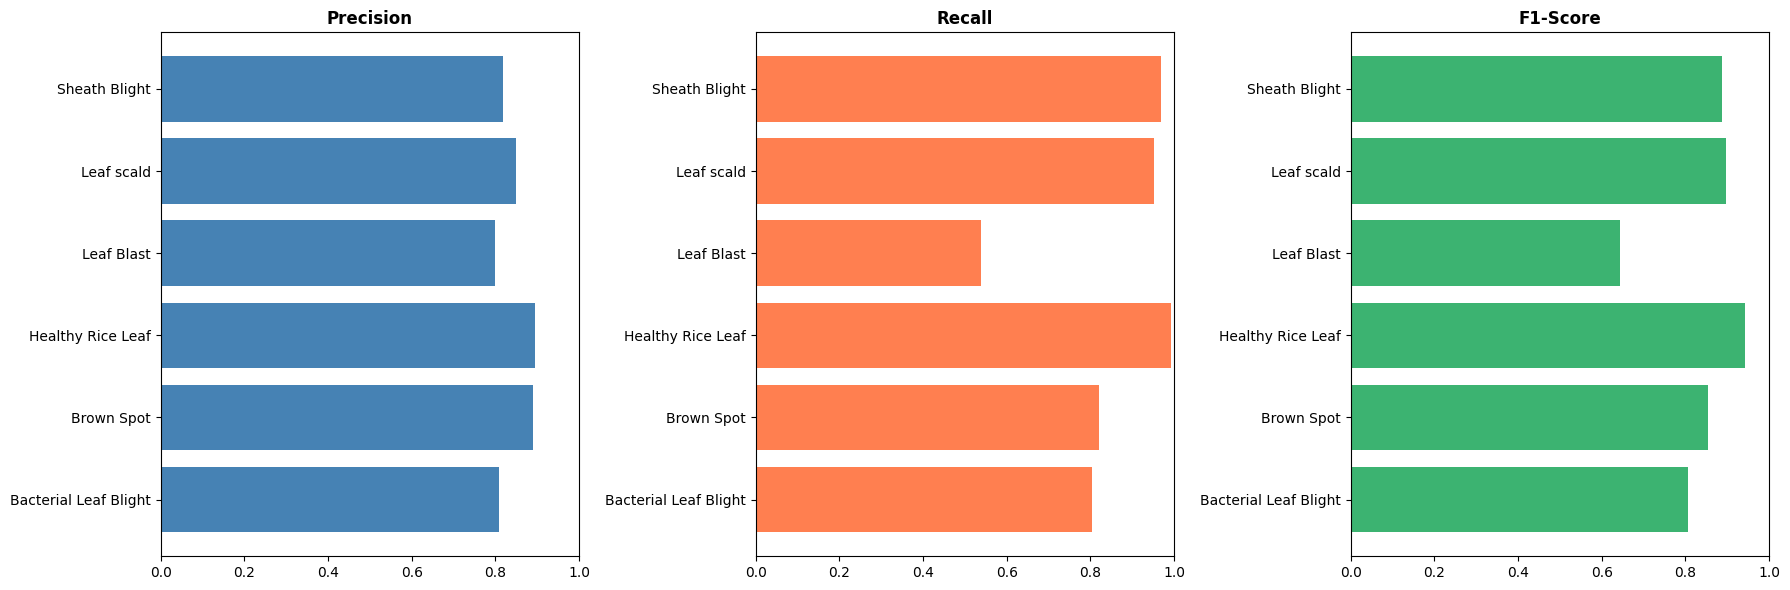

In [17]:
 #===========================
# 13. EVALUATE
# ===========================
print("\n" + "="*70)
print("EVALUATION")
print("="*70)

model = keras.models.load_model('best_rice_model.h5')

test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Predictions
test_generator.reset()
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

class_names = list(train_generator.class_indices.keys())

print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# ===========================
# 14. CONFUSION MATRIX
# ===========================
cm = confusion_matrix(y_true, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')
axes[0].set_ylabel('True')
axes[0].set_xlabel('Predicted')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')
axes[1].set_ylabel('True')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# ===========================
# 15. VISUALIZE PREDICTIONS
# ===========================
def visualize_preds(n=12):
    test_generator.reset()
    imgs, labels = next(test_generator)
    imgs_display = (imgs + 1.0) / 2.0
    preds = model.predict(imgs[:n], verbose=0)
    
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    
    for i in range(n):
        axes[i].imshow(imgs_display[i])
        true_idx = np.argmax(labels[i])
        pred_idx = np.argmax(preds[i])
        color = 'green' if true_idx == pred_idx else 'red'
        axes[i].set_title(f'True: {class_names[true_idx]}\nPred: {class_names[pred_idx]}\n{preds[i][pred_idx]*100:.1f}%',
                         fontsize=9, color=color, fontweight='bold')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_preds(12)

# ===========================
# 16. PER-CLASS METRICS
# ===========================
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred)

df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\n" + "="*70)
print("PER-CLASS PERFORMANCE")
print("="*70)
print(df.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].barh(class_names, precision, color='steelblue')
axes[0].set_title('Precision', fontweight='bold')
axes[0].set_xlim([0, 1])

axes[1].barh(class_names, recall, color='coral')
axes[1].set_title('Recall', fontweight='bold')
axes[1].set_xlim([0, 1])

axes[2].barh(class_names, f1, color='mediumseagreen')
axes[2].set_title('F1-Score', fontweight='bold')
axes[2].set_xlim([0, 1])

plt.tight_layout()
plt.show()


In [18]:
# ===========================
# 17. SAVE & SUMMARY
# ===========================
model.save('rice_disease_final.h5')

print("\n" + "="*70)
print("✅ TRAINING COMPLETE!")
print("="*70)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Model saved: rice_disease_final.h5")
print("="*70)



✅ TRAINING COMPLETE!
✅ Test Accuracy: 82.31%
✅ Model saved: rice_disease_final.h5


In [19]:
# ===========================
# 18. PREDICTION FUNCTION
# ===========================
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_prep = preprocess_input(img_resized)
    img_batch = np.expand_dims(img_prep, axis=0)
    
    pred = model.predict(img_batch, verbose=0)[0]
    pred_idx = np.argmax(pred)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img)
    axes[0].set_title('Input Image')
    axes[0].axis('off')
    
    axes[1].barh(class_names, pred*100, color='steelblue')
    axes[1].set_xlabel('Confidence (%)')
    axes[1].set_title(f'Prediction: {class_names[pred_idx]} ({pred[pred_idx]*100:.2f}%)')
    
    plt.tight_layout()
    plt.show()
    
    return class_names[pred_idx], pred[pred_idx]*100

print("\n✅ Prediction function ready: predict_image('/path/to/image.jpg')")


✅ Prediction function ready: predict_image('/path/to/image.jpg')


In [20]:
import tensorflow as tf

# export SavedModel folder
model.export("rice_disease_tf")

print("✅ Exported SavedModel to rice_disease_tf/")


INFO:tensorflow:Assets written to: rice_disease_tf/assets


INFO:tensorflow:Assets written to: rice_disease_tf/assets


Saved artifact at 'rice_disease_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  47110361838800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032901136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032901328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032900176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032899792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032900560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032900944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032900752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032902288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032901520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  47138032899984: TensorSpec

In [21]:
import shutil

shutil.make_archive("rice_disease_tf", "zip", "rice_disease_tf")
print("✅ Created rice_disease_tf.zip")

✅ Created rice_disease_tf.zip


In [22]:
from IPython.display import FileLink

FileLink("rice_disease_tf.zip")


/root/rice_disease_tf.zip